## Homework week 10 Machine Learning Zoomcamp

**Author:** [Sebastián Ayala Ruano](https://sayalaruano.github.io/)


In [28]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this,
we will use the "Dogs & Cats" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data). 

You need to download the `train.zip` file.

If you have troubles downloading from Kaggle, use [this link](https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip) instead:

```bash
wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

**Note:** You don't need a computer with a GPU for this homework. A laptop or any personal computer should be sufficient.

### Data Preparation

The dataset contains 12,500 images of cats and 12,500 images of dogs. 

Now we need to split this data into train and validation

* Create a `train` and `validation` folders
* In each folder, create `cats` and `dogs` folders
* Move the first 10,000 images to the train folder (from 0 to 9999) for boths cats and dogs - and put them in respective folders
* Move the remaining 2,500 images to the validation folder (from 10000 to 12499)

You can do this manually or with Python (check `os` and `shutil` packages).

In [2]:
# Unzip images for training and validation
!unzip ./dogs_and_cats_dataset_train_val.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10001.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10002.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10003.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10004.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10005.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10006.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10007.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10008.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10009.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10010.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10011.jpg  
  inflating: dogs_and_cats_dataset_train_val/validation/cats/cat.10012.jpg  
  inflating: dogs_and_cat

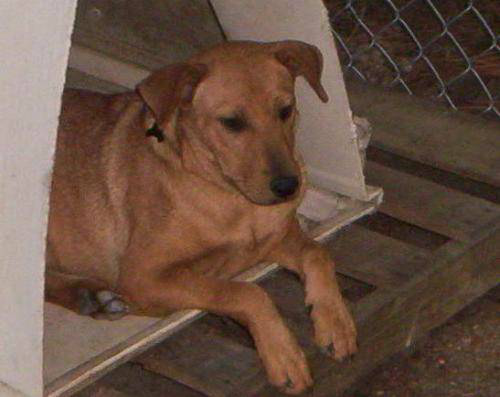

In [6]:
# Load an image for testing
path = './dogs_and_cats_dataset_train_val/train/dogs'
name = 'dog.100.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

### Model

For this homework we will use Convolutional Neural Network (CNN. Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a covolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`


For clarification about kernel size and max pooling, check [Week #11 Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [8]:
# Create the CNN's architecture with functional style
inputs = keras.Input(shape=(150, 150, 3))

conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), 
                           activation="relu")(inputs)

max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

vectors = keras.layers.Flatten()(max_pool_2d)

dense = keras.layers.Dense(64, activation='relu')(vectors)

outputs = keras.layers.Dense(1, activation='sigmoid')(dense)

CNNmodel = keras.Model(inputs, outputs)

optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

**Answer:** The best loss function for binary classification tasks is **BinaryCrossentropy**.

In [16]:
loss = keras.losses.BinaryCrossentropy()

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

**Answer:** 11,215,873 parameters.

In [9]:
CNNmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

### Generators and Training

For the next two questions, use the following data generator for both train and validation:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)
```

In [19]:
# Load images for training and validation with keras' ImageDataGenerator class
image_gen = ImageDataGenerator(rescale=1./255)

train_ds = image_gen.flow_from_directory(
    './dogs_and_cats_dataset_train_val/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
)

val_ds = image_gen.flow_from_directory(
    './dogs_and_cats_dataset_train_val/validation',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

In [20]:
# Add the optimizer, loss, and performance metric to the CNN model
CNNmodel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [21]:
# Train the CNN
history = CNNmodel.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 31s 308ms/step - loss: 0.6982 - accuracy: 0.5215 - val_loss: 0.6904 - val_accuracy: 0.5130
Epoch 2/10
100/100 [==============================] - 31s 310ms/step - loss: 0.6879 - accuracy: 0.5465 - val_loss: 0.6850 - val_accuracy: 0.5580
Epoch 3/10
100/100 [==============================] - 31s 309ms/step - loss: 0.6865 - accuracy: 0.5520 - val_loss: 0.6914 - val_accuracy: 0.5400
Epoch 4/10
100/100 [==============================] - 31s 308ms/step - loss: 0.6811 - accuracy: 0.5505 - val_loss: 0.6729 - val_accuracy: 0.5770
Epoch 5/10
100/100 [==============================] - 31s 308ms/step - loss: 0.6740 - accuracy: 0.5700 - val_loss: 0.6713 - val_accuracy: 0.5830
Epoch 6/10
100/100 [==============================] - 31s 310ms/step - loss: 0.6753 - accuracy: 0.5710 - val_loss: 0.6737 - val_accuracy: 0.5570
Epoch 7/10
100/100 [==============================] - 31s 307ms/step - loss: 0.6621 - accuracy: 0.6020 - val_loss: 0.6819 - val_ac

### Question 3

What is the median of training accuracy for this model?

**Answer:** 0.5705

In [29]:
training_accuracy = pd.DataFrame(history.history["accuracy"])

In [34]:
training_accuracy.sort_values

<bound method DataFrame.sort_values of         0
0  0.5215
1  0.5465
2  0.5520
3  0.5505
4  0.5700
5  0.5710
6  0.6020
7  0.6050
8  0.5990
9  0.6060>

In [31]:
training_accuracy.median()

0    0.5705
dtype: float64

### Question 4

What is the standard deviation of training loss for this model?

**Answer:** 0.016336

In [36]:
training_loss = pd.DataFrame(history.history["loss"])

In [38]:
training_loss.std()

0    0.016336
dtype: float64


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [40]:
train_gen_aug = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
)

train_ds_aug = train_gen_aug.flow_from_directory(
    './dogs_and_cats_dataset_train_val/train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20
)

Found 20000 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of validation loss for the model trained with augmentations?

**Answer:** 0.625817

In [42]:
history2 = CNNmodel.fit(
    train_ds_aug,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 39s 385ms/step - loss: 0.6682 - accuracy: 0.5795 - val_loss: 0.6356 - val_accuracy: 0.6440
Epoch 2/10
100/100 [==============================] - 38s 384ms/step - loss: 0.6660 - accuracy: 0.5950 - val_loss: 0.6326 - val_accuracy: 0.6520
Epoch 3/10
100/100 [==============================] - 38s 381ms/step - loss: 0.6707 - accuracy: 0.5715 - val_loss: 0.6445 - val_accuracy: 0.6280
Epoch 4/10
100/100 [==============================] - 38s 380ms/step - loss: 0.6577 - accuracy: 0.5985 - val_loss: 0.6366 - val_accuracy: 0.6510
Epoch 5/10
100/100 [==============================] - 38s 382ms/step - loss: 0.6513 - accuracy: 0.6075 - val_loss: 0.6131 - val_accuracy: 0.6650
Epoch 6/10
100/100 [==============================] - 38s 379ms/step - loss: 0.6555 - accuracy: 0.6085 - val_loss: 0.6341 - val_accuracy: 0.6530
Epoch 7/10
100/100 [==============================] - 37s 374ms/step - loss: 0.6551 - accuracy: 0.6070 - val_loss: 0.6182 - val_ac

In [52]:
validation_loss_aug = pd.DataFrame(history2.history["val_loss"])

In [54]:
validation_loss_aug.mean()

0    0.625817
dtype: float64

### Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

**Answer:** 0.6574

In [55]:
validation_acc_aug = pd.DataFrame(history2.history["val_accuracy"])

In [66]:
validation_acc_aug

,0
0,0.644
1,0.652
2,0.628
3,0.651
4,0.665
5,0.653
6,0.649
7,0.658
8,0.650
9,0.677


In [65]:
validation_acc_aug[5:10].mean()

0    0.6574
dtype: float64

### Using the model 

In [84]:
path = 'dogs_and_cats_dataset_train_val/validation/cats/cat.10015.jpg'

In [85]:
img = load_img(path, target_size=(150, 150))

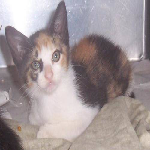

In [86]:
img

In [87]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [88]:
pred = CNNmodel.predict(X)

In [89]:
pred

array([[0.]], dtype=float32)

In [90]:
classes = [
    'cat',
    'dog'
]

In [92]:
dict(zip(classes, pred[0]))

{'cat': 0.0}